**APPENDIX H**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import random
 
import statsmodels.api as sm
 
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error
 
# Import Keras
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense, LSTM
 
# Import Prophet
from fbprophet import Prophet
# Import VAR Model
from statsmodels.tsa.vector_ar.var_model import VAR
 
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import numpy
import pandas
from matplotlib import pyplot 
from math import sqrt
from datetime import datetime
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
import seaborn as sns

In [ ]:
df = pd.read_csv('Aotizhongxin1 - Copy (3) - Copy.csv')
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,4.4
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,4.7
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,5.6
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,3.1
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,2.0


In [ ]:
df['date'] = df[['year', 'month', 'day', 'hour']].apply(lambda row: f"{row['year']}-{row['month']}-{row['day']} {row['hour']}:00:00", axis=1)
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,date
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,4.4,2013-03-01 00:00:00
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,4.7,2013-03-01 01:00:00
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,5.6,2013-03-01 02:00:00
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,3.1,2013-03-01 03:00:00
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,2.0,2013-03-01 04:00:00


In [ ]:

df.drop(['No','year','month','day','hour'], axis=1, inplace=True)
df.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,date
0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,4.4,2013-03-01 00:00:00
1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,4.7,2013-03-01 01:00:00
2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,5.6,2013-03-01 02:00:00
3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,3.1,2013-03-01 03:00:00
4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,2.0,2013-03-01 04:00:00


In [ ]:
df.sort_values(by='date', inplace=True)
df.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,date
0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,4.4,2013-03-01 00:00:00
1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,4.7,2013-03-01 01:00:00
2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,5.6,2013-03-01 02:00:00
3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,3.1,2013-03-01 03:00:00
4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,2.0,2013-03-01 04:00:00


In [ ]:
df['date'].min(), df['date'].max()

(Timestamp('2013-03-01 00:00:00'), Timestamp('2017-02-28 23:00:00'))

In [ ]:
df.set_index('date', inplace=True)
df.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
date,,,,,,,,,,,
2013-03-01 00:00:00,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,4.4
2013-03-01 01:00:00,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,4.7
2013-03-01 02:00:00,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,5.6
2013-03-01 03:00:00,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,3.1
2013-03-01 04:00:00,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,2.0


In [ ]:
# Data grouped Month-wise
grpd_df = df.resample('MS').mean()
print(grpd_df.shape)
grpd_df.head()

(48, 11)


,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
date,,,,,,,,,,,
2013-03-01,110.092742,144.147849,44.834608,74.769694,1470.720878,46.841454,6.053629,1012.547446,-5.729435,0.026210,2.000134
2013-04-01,62.751389,108.204167,24.733914,53.789352,921.192593,51.505010,12.260694,1008.296944,-1.553611,0.015139,2.209722
2013-05-01,85.090502,140.778226,30.442204,61.016129,933.239695,75.590768,21.374194,1003.162231,9.790457,0.007796,1.740457
2013-06-01,106.179167,128.716667,14.474761,72.698583,1240.300463,71.235024,23.386111,1000.165556,18.009028,0.130694,1.240000
2013-07-01,68.911290,85.391129,9.284144,55.137308,818.043907,71.914410,26.877419,996.033065,21.459946,0.293817,1.278763


In [ ]:
df['2013-03-01']['PM2.5'].mean()

7.125

In [ ]:
df['PM2.5'].fillna(method='ffill', inplace=True)
df['PM2.5'].fillna(value=df['2013-03-01']['PM2.5'].mean(), inplace=True)
df.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
date,,,,,,,,,,,
2013-03-01 00:00:00,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,4.4
2013-03-01 01:00:00,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,4.7
2013-03-01 02:00:00,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,5.6
2013-03-01 03:00:00,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,3.1
2013-03-01 04:00:00,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,2.0


In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 16, 6

def plot_pred_date(pred):
    pred = pd.DataFrame(sc.inverse_transform(pred), columns=df.columns, index=valid.index)
    temp = pd.DataFrame(sc.inverse_transform(train), columns=train.columns, index=train.index)
    
    for col in temp.columns:
        plt.plot(temp[col], 'r-', label='Actual Data')
        plt.plot(pred[col], 'b-', label='Predicted Data')
        plt.legend()
        plt.xlabel('Date')
        plt.ylabel(col)
        plt.title(f'Predicted {col} vs DateTime')
        plt.show()
        
    return


def plot_actual_pred(pred):
    pred = pd.DataFrame(sc.inverse_transform(pred), columns=df.columns, index=valid.index)
    temp = pd.DataFrame(sc.inverse_transform(valid), columns=valid.columns, index=valid.index)

    for col in temp.columns:
        plt.plot(temp[col], 'r-', label='Actual Data')
        plt.plot(pred[col], 'b-', label='Predicted Data')
        plt.legend()
        plt.xlabel('Date')
        plt.ylabel(col)
        plt.title(f'Actual {col} vs Predicted {col}')
        plt.show()
        
    return

In [ ]:
d_train = df[:int(0.7*(len(df)))]
d_valid = df[int(0.7*(len(df))):]

In [ ]:
sc = StandardScaler()
sc.fit(d_train)
train = pd.DataFrame(sc.transform(d_train), columns=df.columns, index=d_train.index)
valid = pd.DataFrame(sc.transform(d_valid), columns=df.columns, index=d_valid.index)

In [ ]:
n_input = len(train.columns)
n_features= len(train.columns)
generator = TimeseriesGenerator(train.values, train.values, length=n_input, batch_size=10)
test_data = np.vstack((train[-n_input:], valid.values))
valid_generator = TimeseriesGenerator(test_data, test_data, length=n_input, batch_size=len(test_data))

In [ ]:
d_train = df[:int(0.7*(len(df)))]
d_valid = df[int(0.7*(len(df))):]


sc = StandardScaler()
sc.fit(d_train)
train = pd.DataFrame(sc.transform(d_train), columns=df.columns, index=d_train.index)
valid = pd.DataFrame(sc.transform(d_valid), columns=df.columns, index=d_valid.index)



n_input = len(train.columns)
n_features= len(train.columns)
generator = TimeseriesGenerator(train.values, train.values, length=n_input, batch_size=10)
test_data = np.vstack((train[-n_input:], valid.values))
valid_generator = TimeseriesGenerator(test_data, test_data, length=n_input, batch_size=len(test_data))


from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, RMSprop, Adam





lstm_model = tf.keras.Sequential()
lstm_model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(500, activation='relu', return_sequences=True), input_shape=(n_input, n_features)))
lstm_model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(200, activation='relu', return_sequences=True)))
lstm_model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100, activation='relu')))
lstm_model.add(tf.keras.layers.Dense(11))
lstm_model.compile(Adam(lr=1e-04), loss='mse')

lstm_model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 11, 1000)          2048000   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 11, 400)           1921600   
_________________________________________________________________
bidirectional_2 (Bidirection (None, 200)               400800    
_________________________________________________________________
dense (Dense)                (None, 11)                2211      
Total params: 4,372,611
Trainable params: 4,372,611
Non-trainable params: 0
_________________________________________________________________


In [ ]:

history = lstm_model.fit_generator(generator,epochs=25)

Epoch 1/25
2454/2454 [==============================] - 648s 261ms/step - loss: 0.6852
Epoch 2/25
2454/2454 [==============================] - 642s 262ms/step - loss: 0.2236
Epoch 3/25
2454/2454 [==============================] - 636s 259ms/step - loss: 0.2081
Epoch 4/25
2454/2454 [==============================] - 635s 259ms/step - loss: 0.1765
Epoch 5/25
2454/2454 [==============================] - 636s 259ms/step - loss: 0.1660
Epoch 6/25
2454/2454 [==============================] - 640s 261ms/step - loss: 0.1867
Epoch 7/25
2454/2454 [==============================] - 637s 260ms/step - loss: 0.1647
Epoch 8/25
1536/2454 [=================>............] - ETA: 3:59 - loss: 0.1344

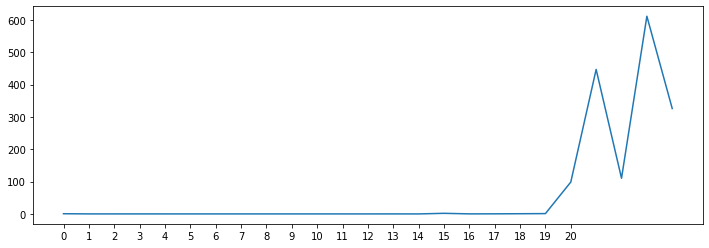

In [ ]:
losses_lstm = lstm_model.history.history['loss']

plt.figure(figsize=(12,4))
plt.xticks(np.arange(0,21,1))
plt.plot(range(len(losses_lstm)),losses_lstm);

In [ ]:
lstm_predictions_scaled = list()

batch = train[-n_input:]
current_batch = batch.values.reshape((1, n_input, n_features))

for i in range(len(valid)):   
    lstm_pred = lstm_model.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[lstm_pred]], axis=1)



predictions = lstm_model.predict_generator(valid_generator)
predictions.shape, valid.shape

((10520, 11), (10520, 11))

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
lstm_pred = pd.DataFrame(predictions, columns=df.columns)

#check rmse
for i in df.columns:
    try:
        print('RMSE value for', i, 'is : ', np.sqrt(mean_squared_error(lstm_pred[i], valid[i])))
        print('MSE value for', i, 'is : ', (mean_squared_error(lstm_pred[i], valid[i])))
        print('MAE value for', i, 'is : ', (mean_absolute_error(lstm_pred[i], valid[i])))
        print('R2 value for', i, 'is : ', (r2_score(lstm_pred[i], valid[i])))
    except Exception as err:
        print(i, err)

RMSE value for PM2.5 is :  1.1265717864759952
MSE value for PM2.5 is :  1.2691639900837155
MAE value for PM2.5 is :  0.8196201559310738
R2 value for PM2.5 is :  -59.176245585327585
RMSE value for PM10 is :  1.0585588383301223
MSE value for PM10 is :  1.120546814206818
MAE value for PM10 is :  0.8143067656973418
R2 value for PM10 is :  -161.65147667492926
RMSE value for SO2 is :  0.7037873939425842
MSE value for SO2 is :  0.4953166958724941
MAE value for SO2 is :  0.5009307150127492
R2 value for SO2 is :  -14.658823885569541
RMSE value for NO2 is :  1.104152518806635
MSE value for NO2 is :  1.2191527847870365
MAE value for NO2 is :  0.9079533277827379
R2 value for NO2 is :  -22.11259420098603
RMSE value for CO is :  1.3783065255691
MSE value for CO is :  1.8997288784263642
MAE value for CO is :  0.8573482798533668
R2 value for CO is :  -8.922958699215508
RMSE value for O3 is :  0.9976082346679825
MSE value for O3 is :  0.9952221898773685
MAE value for O3 is :  0.7373918568934851
R2 valu

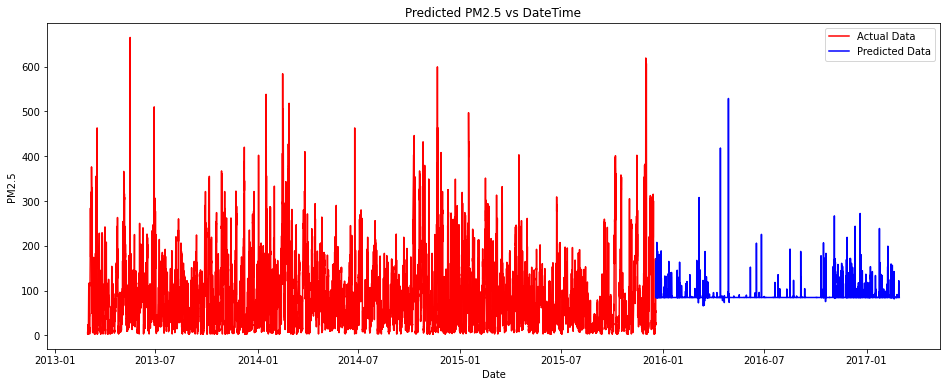

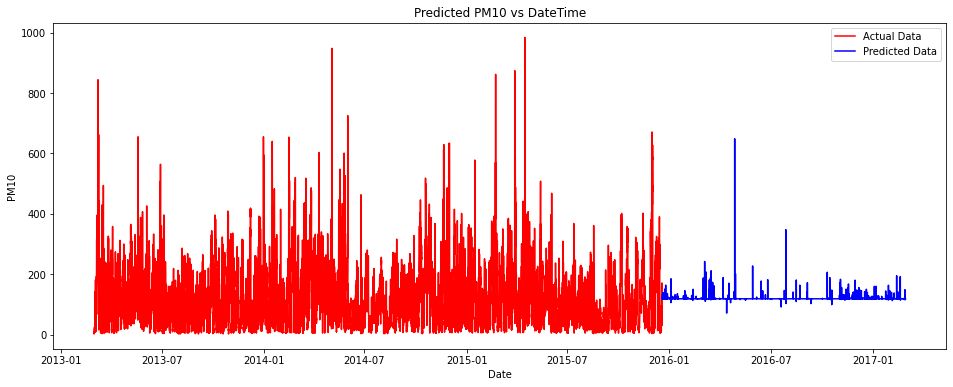

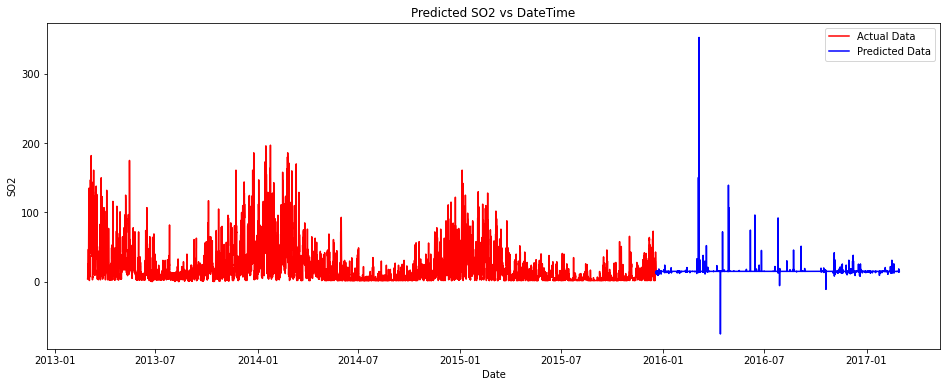

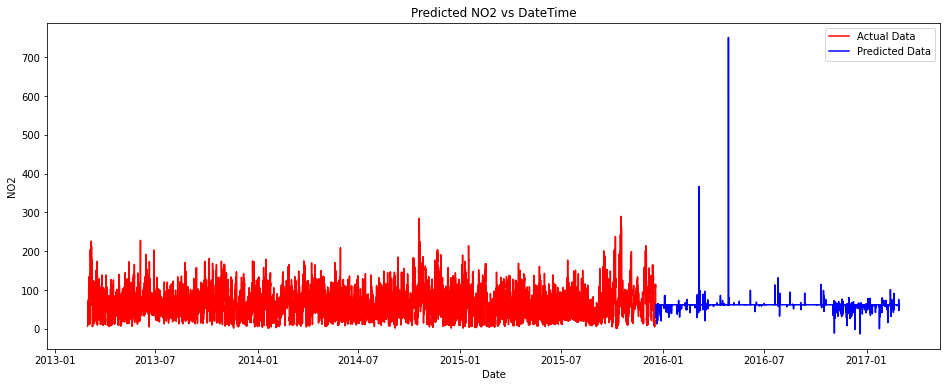

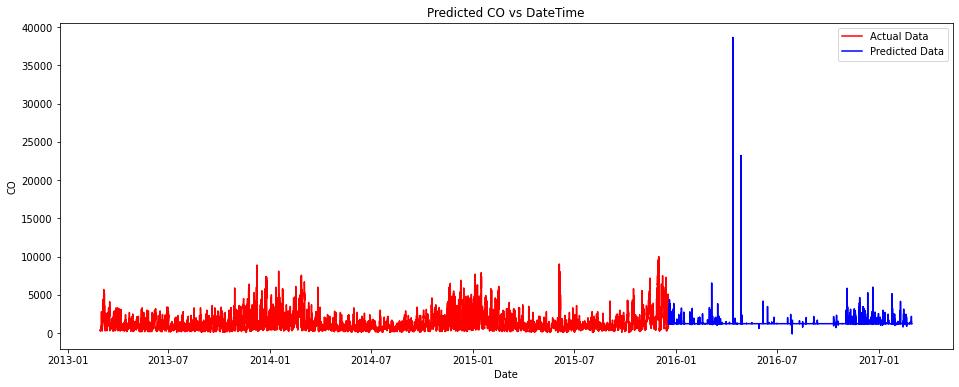

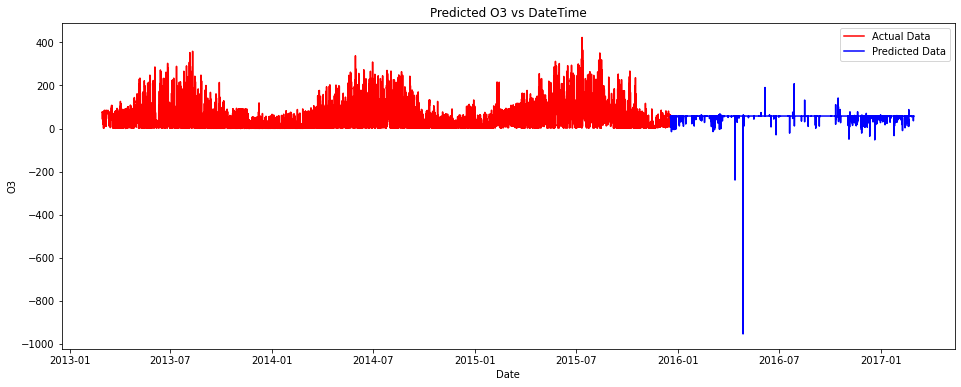

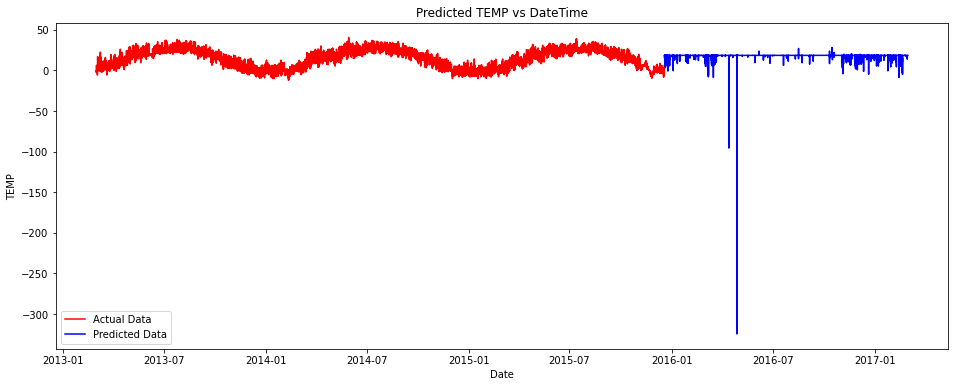

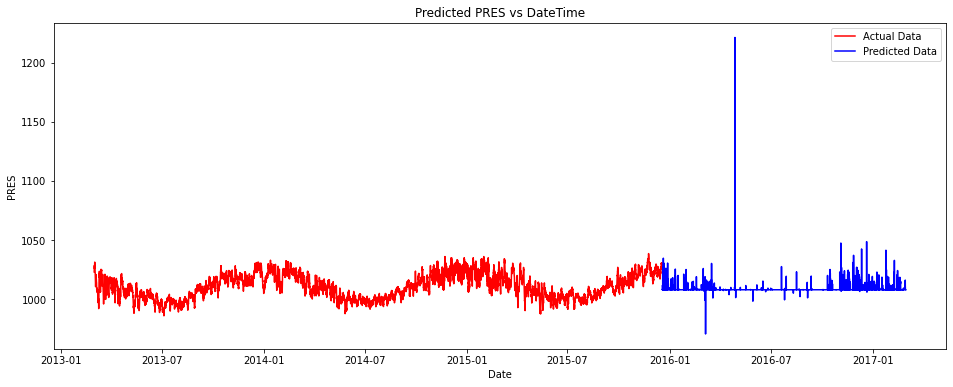

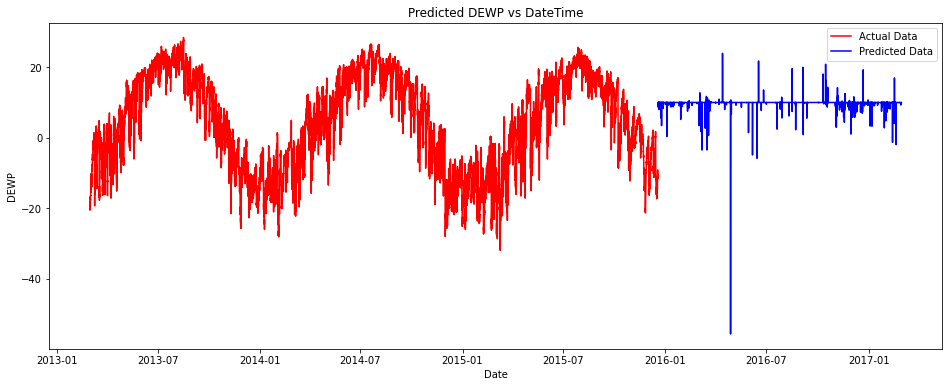

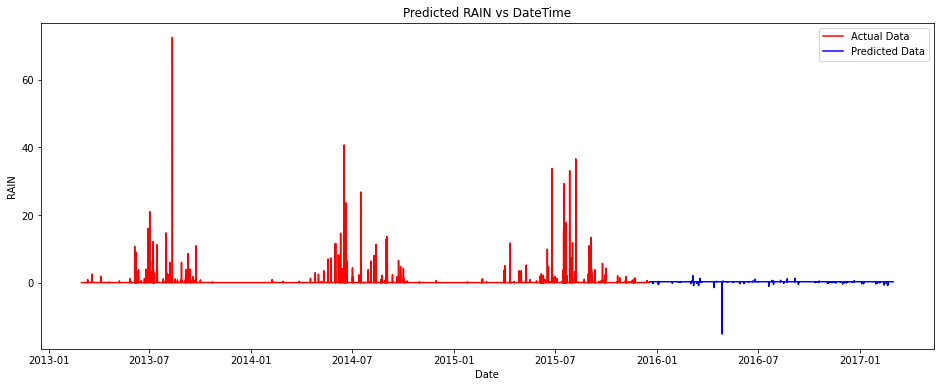

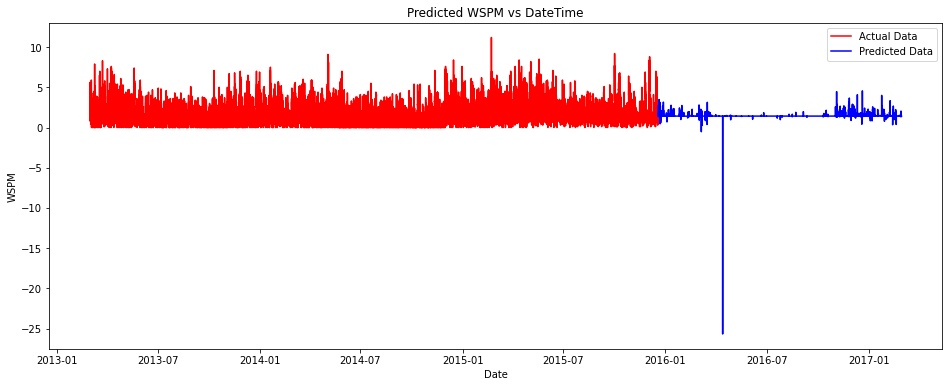

In [ ]:
plot_pred_date(lstm_pred)

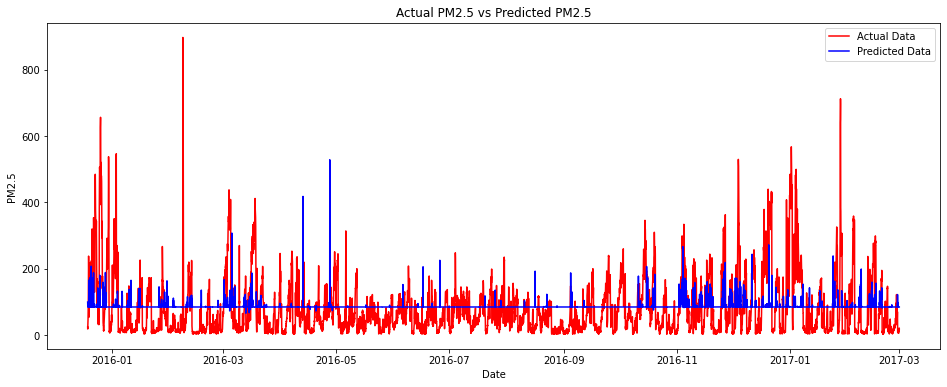

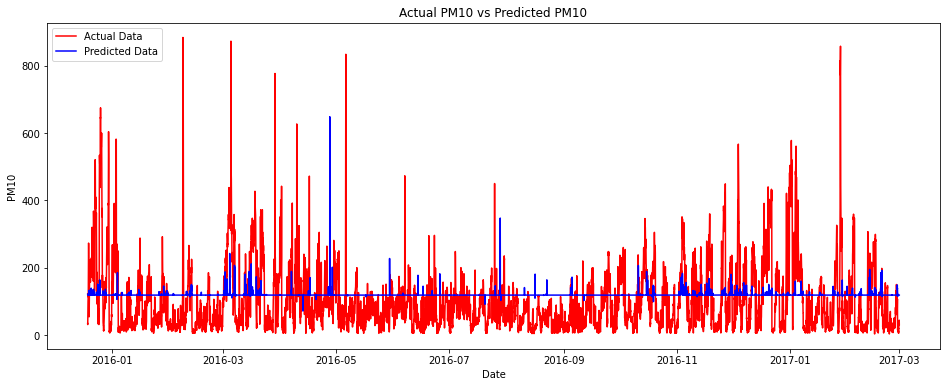

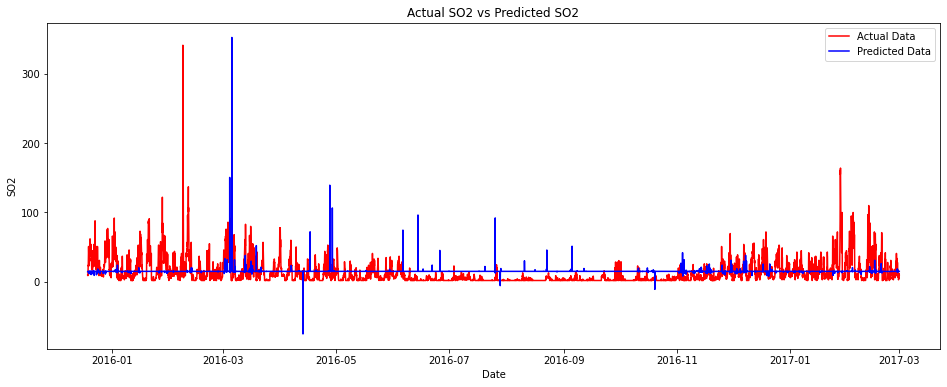

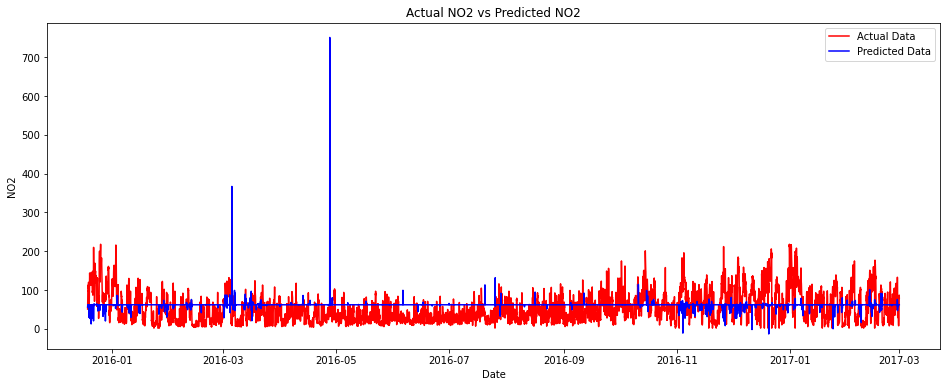

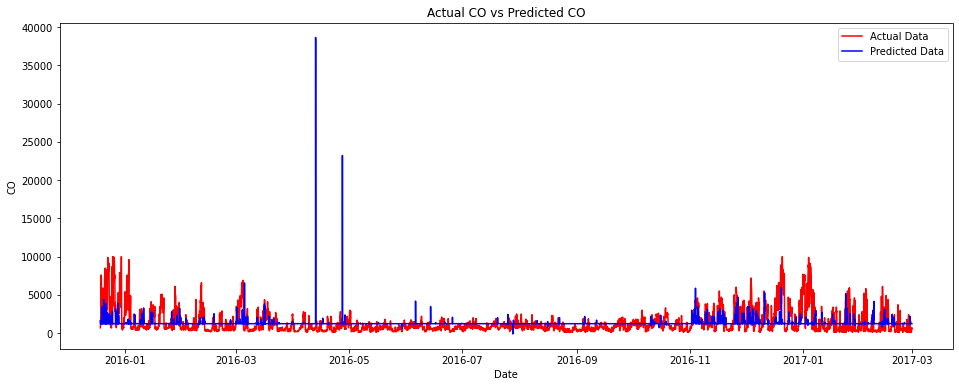

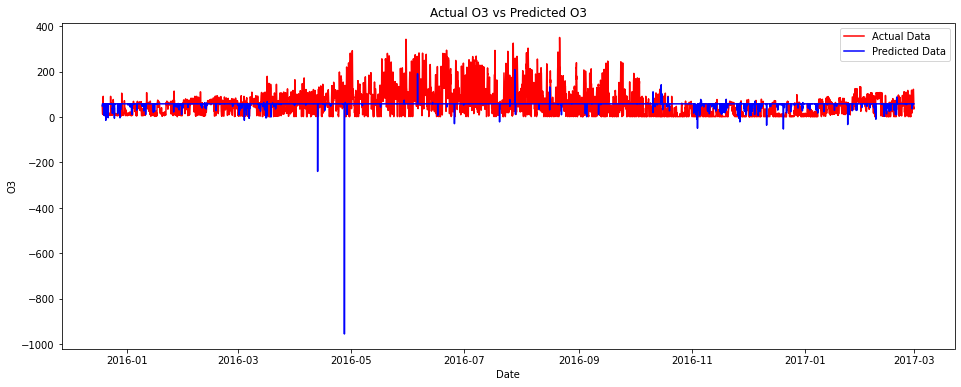

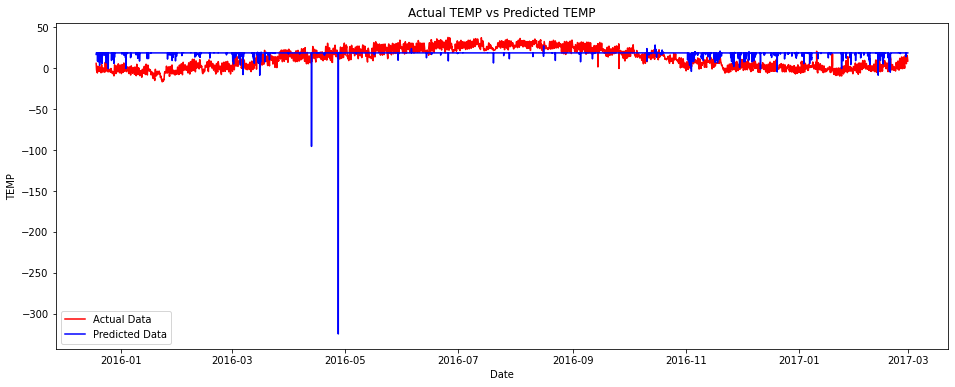

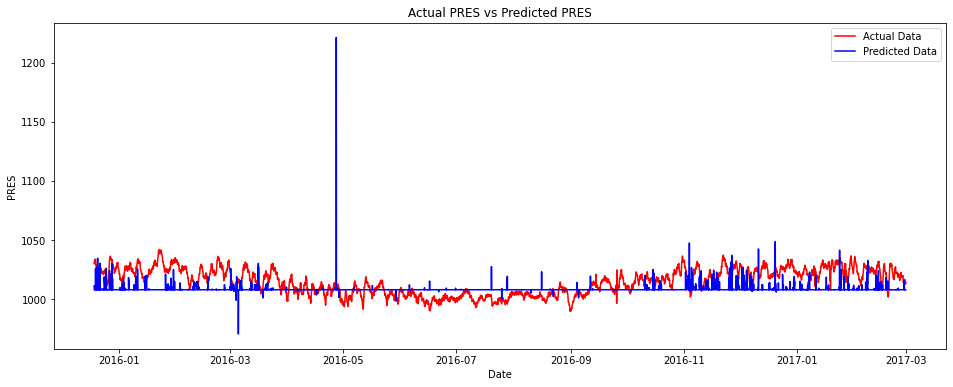

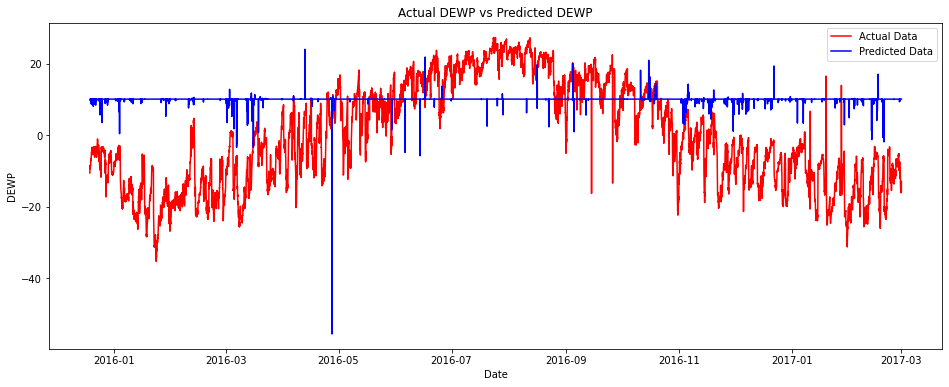

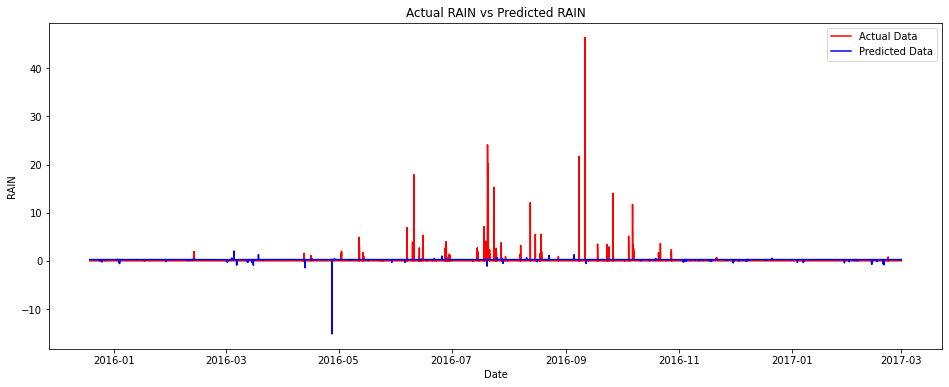

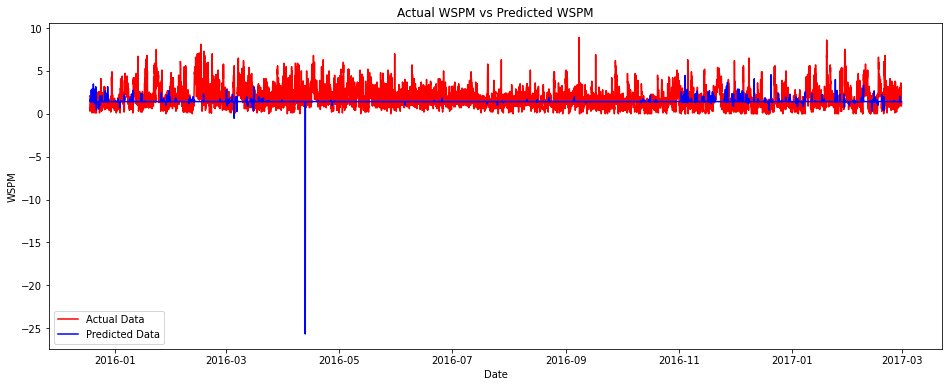

In [ ]:
plot_actual_pred(lstm_pred)

In [ ]:
d_train = df[:int(0.7*(len(df)))]
d_valid = df[int(0.7*(len(df))):]


sc = StandardScaler()
sc.fit(d_train)
train = pd.DataFrame(sc.transform(d_train), columns=df.columns, index=d_train.index)
valid = pd.DataFrame(sc.transform(d_valid), columns=df.columns, index=d_valid.index)



n_input = len(train.columns)
n_features= len(train.columns)
generator = TimeseriesGenerator(train.values, train.values, length=n_input, batch_size=10)
test_data = np.vstack((train[-n_input:], valid.values))
valid_generator = TimeseriesGenerator(test_data, test_data, length=n_input, batch_size=len(test_data))


from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, RMSprop, Adam





lstm_model = tf.keras.Sequential()
lstm_model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(500, activation='relu', return_sequences=True), input_shape=(n_input, n_features)))
lstm_model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(200, activation='relu', return_sequences=True)))
lstm_model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100, activation='relu')))
lstm_model.add(tf.keras.layers.Dense(11))
lstm_model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])

lstm_model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 11, 1000)          2048000   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 11, 400)           1921600   
_________________________________________________________________
bidirectional_2 (Bidirection (None, 200)               400800    
_________________________________________________________________
dense (Dense)                (None, 11)                2211      
Total params: 4,372,611
Trainable params: 4,372,611
Non-trainable params: 0
_________________________________________________________________


In [ ]:

history = lstm_model.fit_generator(generator,epochs=25)

Epoch 1/25
2454/2454 [==============================] - 696s 281ms/step - loss: 2.1033 - accuracy: 0.5327
Epoch 2/25
2454/2454 [==============================] - 691s 282ms/step - loss: 0.2287 - accuracy: 0.7391
Epoch 3/25
2454/2454 [==============================] - 693s 283ms/step - loss: 0.1947 - accuracy: 0.7601
Epoch 4/25
2454/2454 [==============================] - 692s 282ms/step - loss: 0.1997 - accuracy: 0.7755
Epoch 5/25
2454/2454 [==============================] - 691s 282ms/step - loss: 0.2136 - accuracy: 0.7815
Epoch 6/25
2454/2454 [==============================] - 699s 285ms/step - loss: 0.1854 - accuracy: 0.7753
Epoch 7/25
2454/2454 [==============================] - 694s 283ms/step - loss: 0.1624 - accuracy: 0.7799
Epoch 8/25
2454/2454 [==============================] - 702s 286ms/step - loss: 0.1856 - accuracy: 0.7792
Epoch 9/25
2454/2454 [==============================] - 697s 284ms/step - loss: 0.2168 - accuracy: 0.7825
Epoch 10/25
2454/2454 [=======================

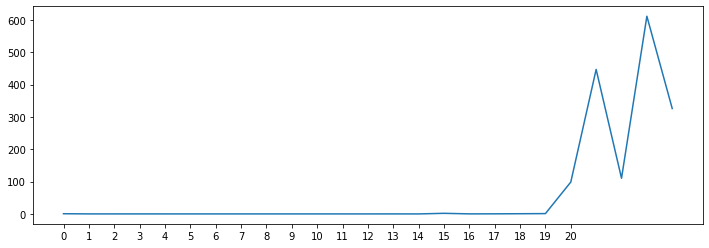

In [ ]:
losses_lstm = lstm_model.history.history['loss']

plt.figure(figsize=(12,4))
plt.xticks(np.arange(0,21,1))
plt.plot(range(len(losses_lstm)),losses_lstm);

In [ ]:
lstm_predictions_scaled = list()

batch = train[-n_input:]
current_batch = batch.values.reshape((1, n_input, n_features))

for i in range(len(valid)):   
    lstm_pred = lstm_model.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred)
    current_batch = np.append(current_batch[:,1:,:],[[lstm_pred]], axis=1)



predictions = lstm_model.predict_generator(valid_generator)
predictions.shape, valid.shape


from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
lstm_pred = pd.DataFrame(predictions, columns=df.columns)

#check rmse
for i in df.columns:
    try:
        print('RMSE value for', i, 'is : ', np.sqrt(mean_squared_error(lstm_pred[i], valid[i])))
        print('MSE value for', i, 'is : ', (mean_squared_error(lstm_pred[i], valid[i])))
        print('MAE value for', i, 'is : ', (mean_absolute_error(lstm_pred[i], valid[i])))
        print('R2 value for', i, 'is : ', (r2_score(lstm_pred[i], valid[i],  multioutput='variance_weighted')))
    except Exception as err:
        print(i, err)
   

RMSE value for PM2.5 is :  4.35454297403203
MSE value for PM2.5 is :  18.962044512691712
MAE value for PM2.5 is :  0.2708711851556706
R2 value for PM2.5 is :  0.033146503852070075
RMSE value for PM10 is :  2.3601028120606093
MSE value for PM10 is :  5.570085283496396
MAE value for PM10 is :  0.3287969312355783
R2 value for PM10 is :  0.05457225811817734
RMSE value for SO2 is :  2.51470097462054
MSE value for SO2 is :  6.323720991757494
MAE value for SO2 is :  0.22136134808138372
R2 value for SO2 is :  0.05334792061265259
RMSE value for NO2 is :  1.7312332397266827
MSE value for NO2 is :  2.9971685303345454
MAE value for NO2 is :  0.3050203005908337
R2 value for NO2 is :  0.19757651063684956
RMSE value for CO is :  1.346390901527275
MSE value for CO is :  1.8127684597154285
MAE value for CO is :  0.2953079324881202
R2 value for CO is :  0.3001072675523774
RMSE value for O3 is :  4.0196365915526195
MSE value for O3 is :  16.157478328148763
MAE value for O3 is :  0.29272905188873455
R2 va

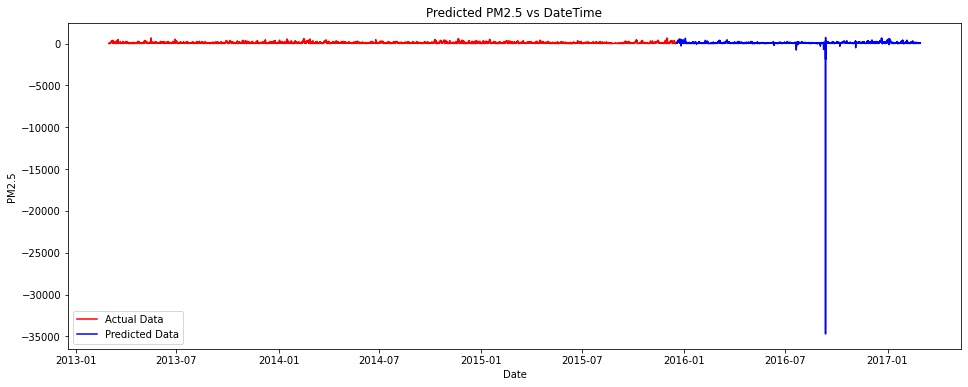

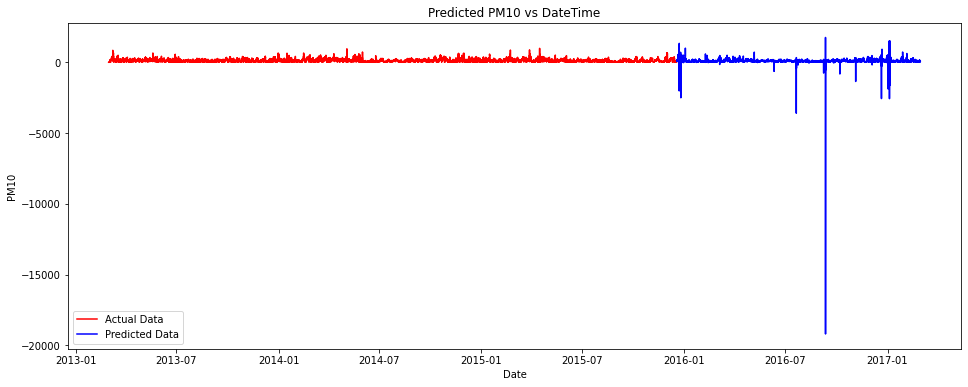

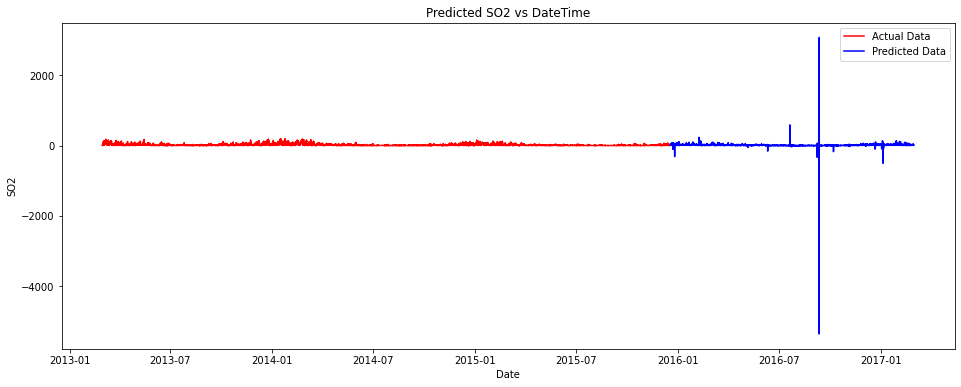

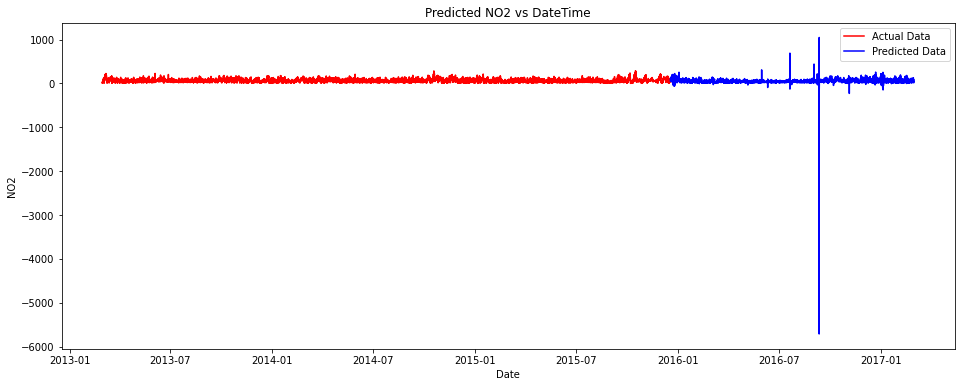

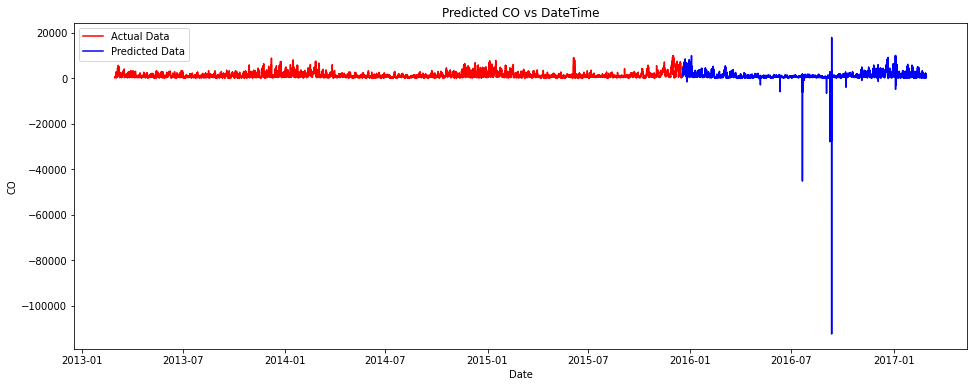

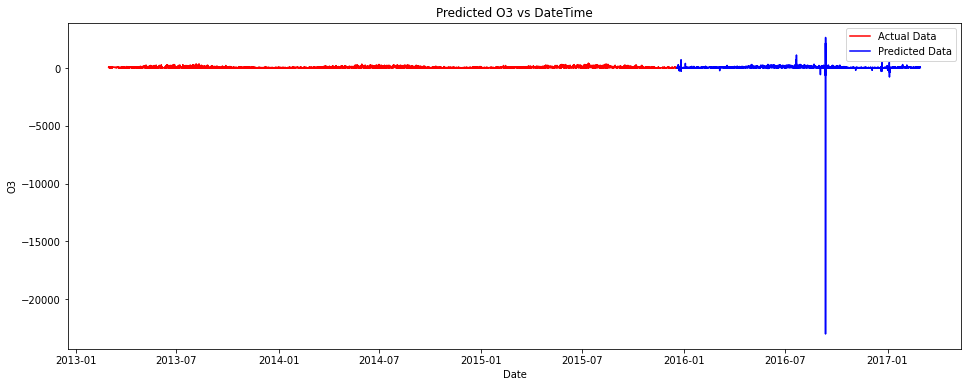

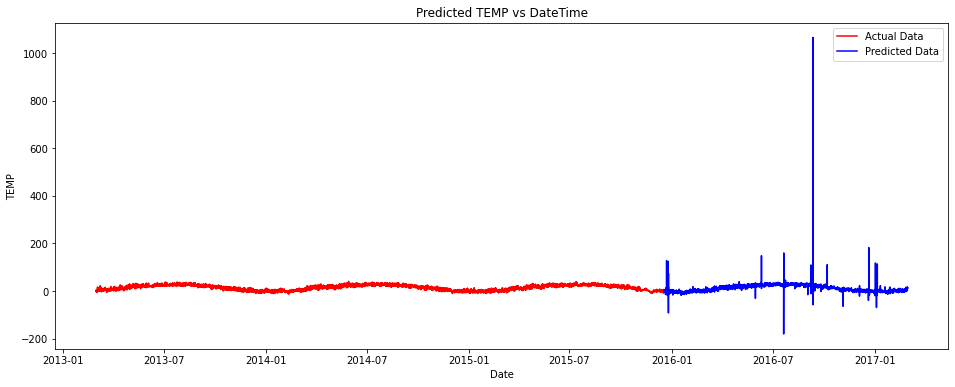

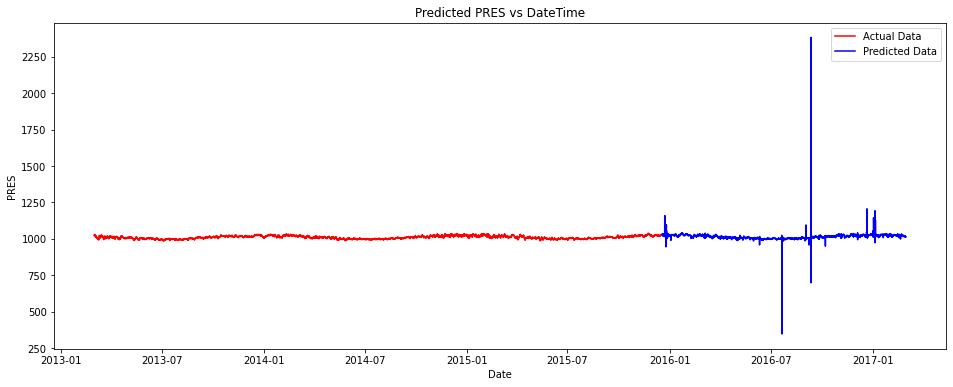

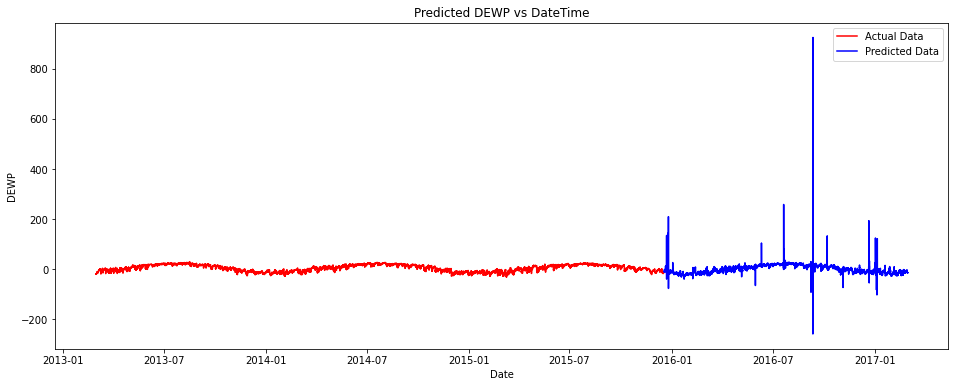

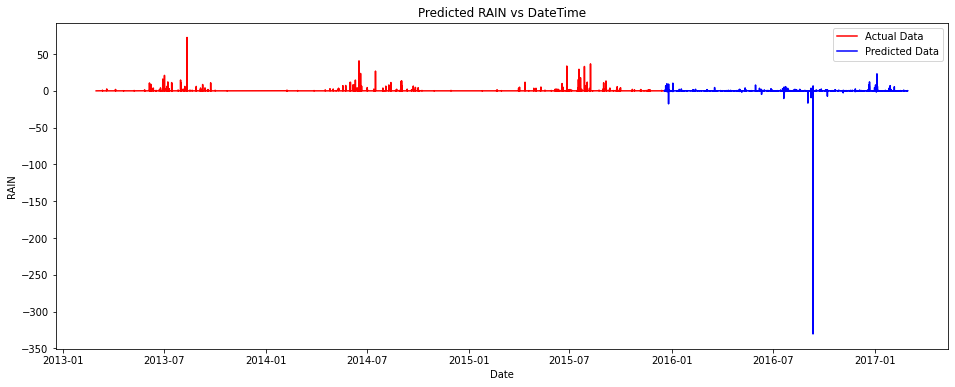

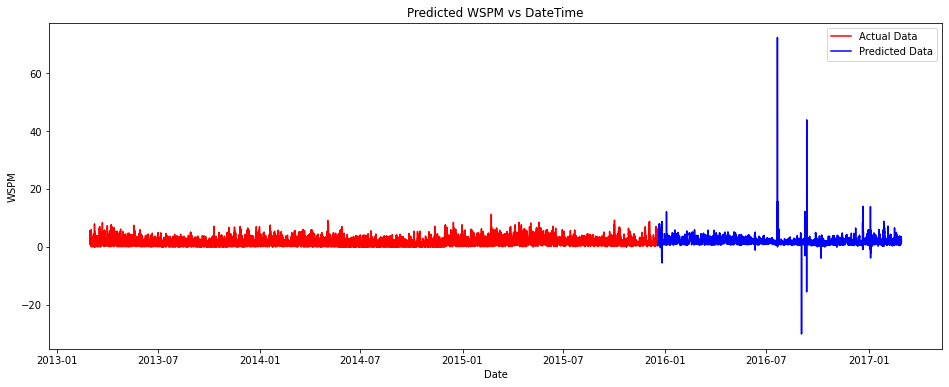

In [ ]:
plot_pred_date(lstm_pred)

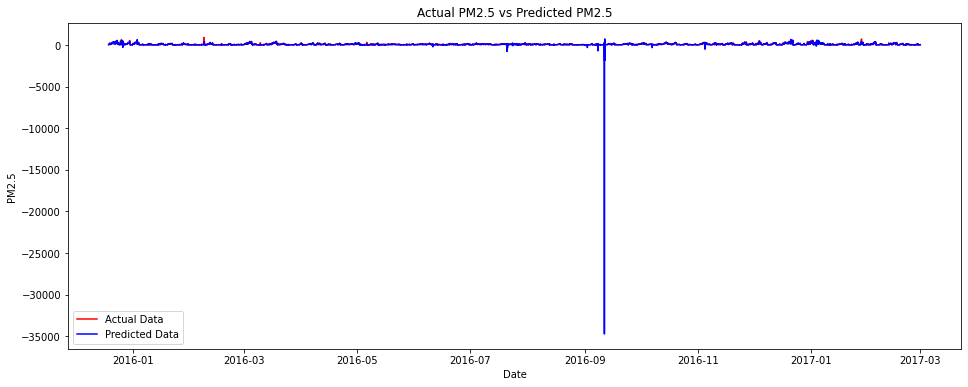

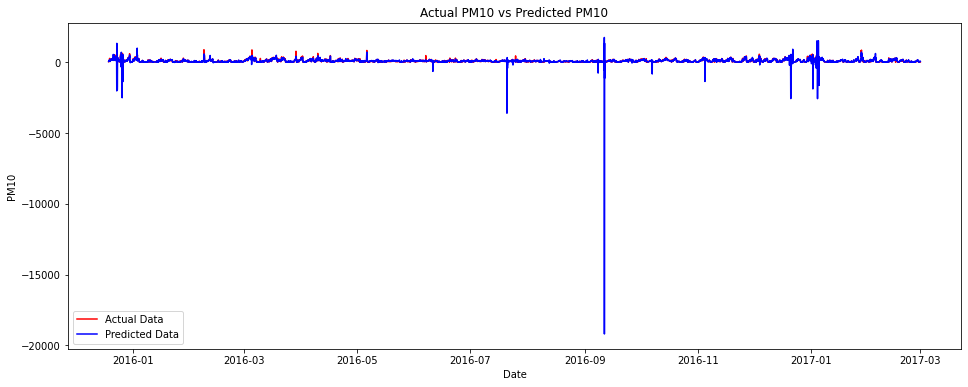

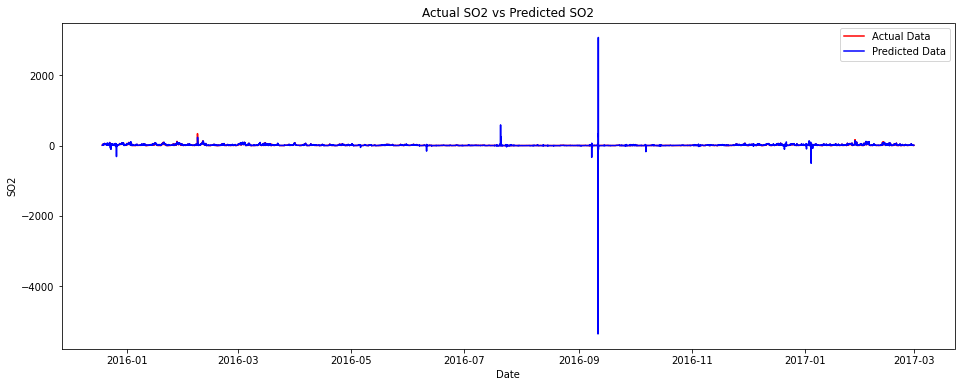

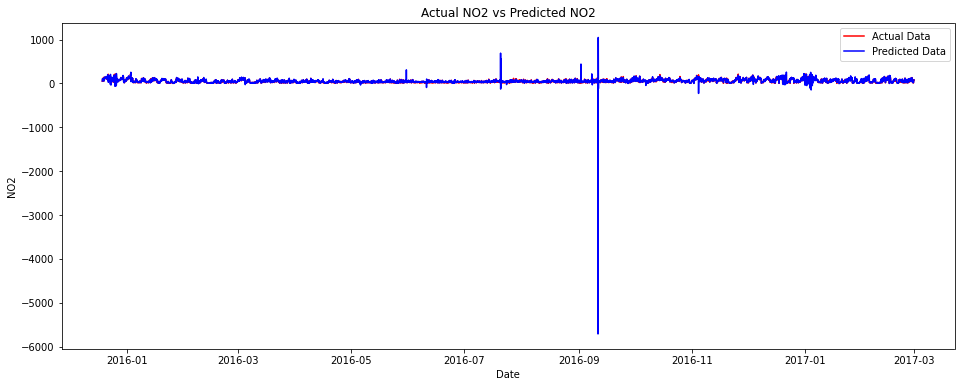

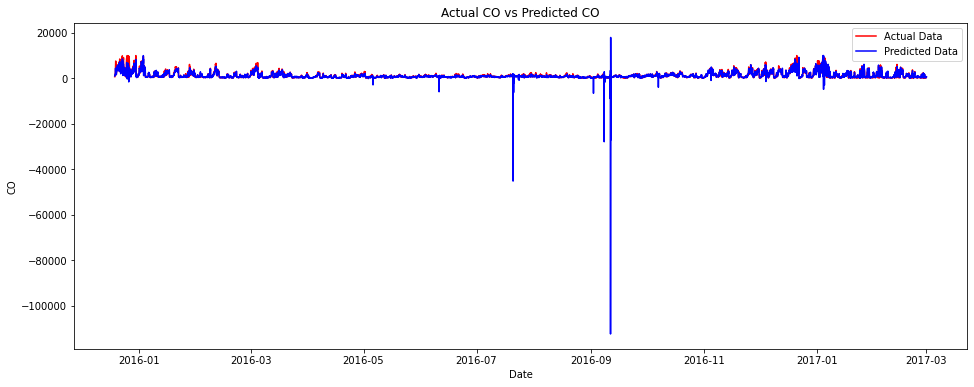

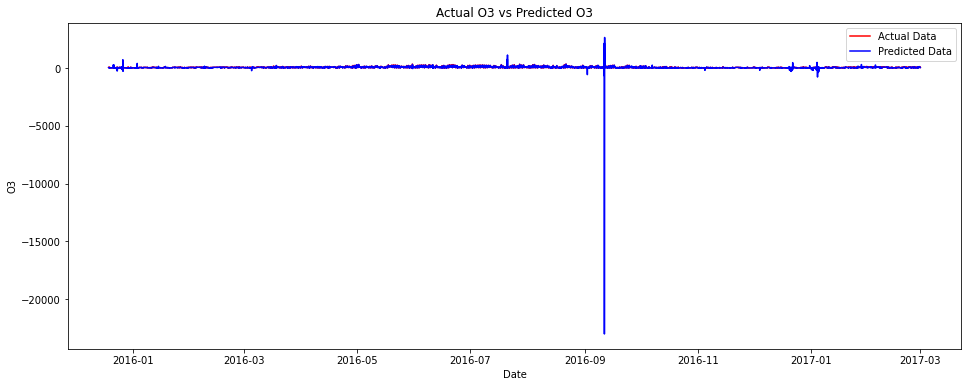

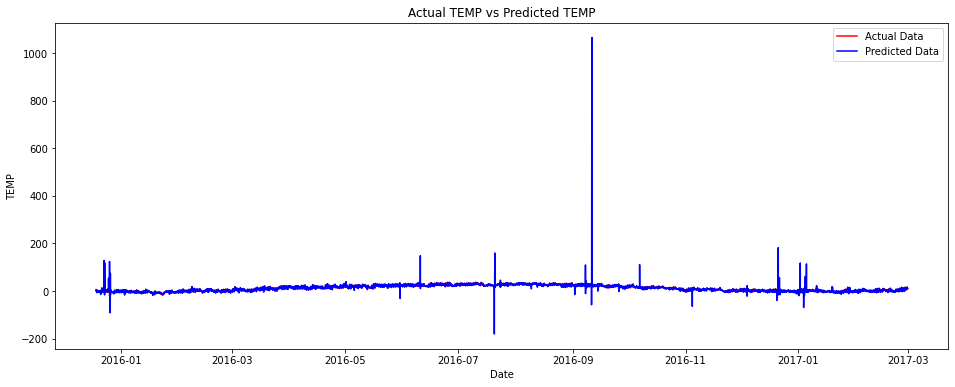

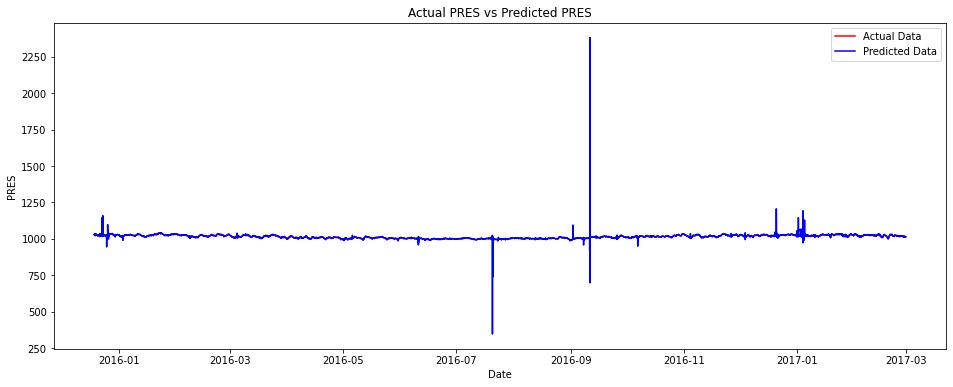

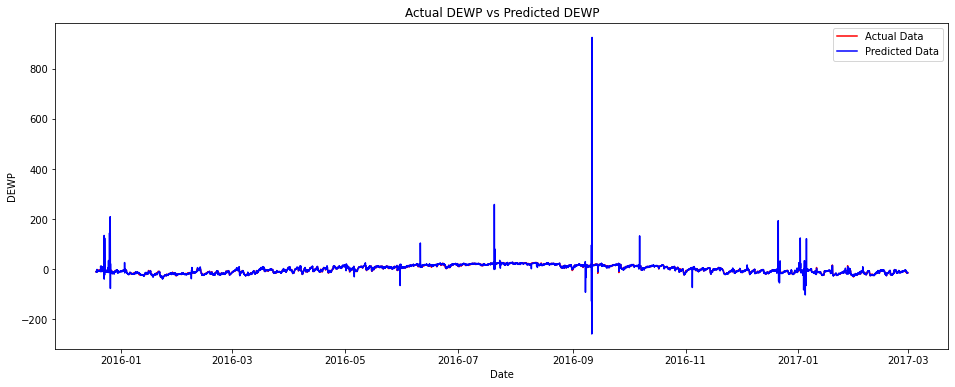

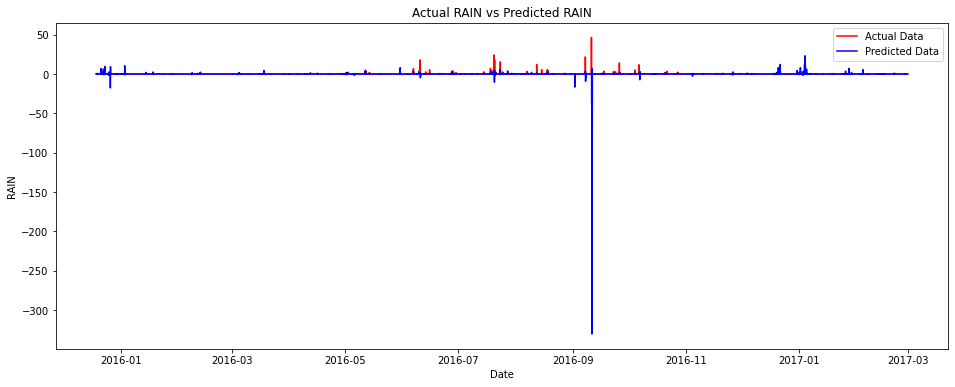

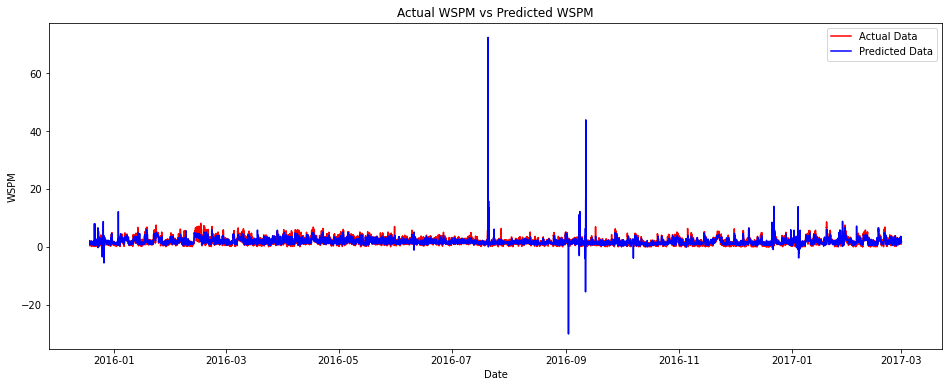

In [ ]:
plot_actual_pred(lstm_pred)

In [ ]:
d_train = df[:int(0.7*(len(df)))]
d_valid = df[int(0.7*(len(df))):]


sc = StandardScaler()
sc.fit(d_train)
train = pd.DataFrame(sc.transform(d_train), columns=df.columns, index=d_train.index)
valid = pd.DataFrame(sc.transform(d_valid), columns=df.columns, index=d_valid.index)



n_input = len(train.columns)
n_features= len(train.columns)
generator = TimeseriesGenerator(train.values, train.values, length=n_input, batch_size=10)
test_data = np.vstack((train[-n_input:], valid.values))
valid_generator = TimeseriesGenerator(test_data, test_data, length=n_input, batch_size=len(test_data))


from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, RMSprop, Adam





lstm_model = tf.keras.Sequential()
lstm_model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(500, activation='relu', return_sequences=True), input_shape=(n_input, n_features)))
lstm_model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(200, activation='relu', return_sequences=True)))
lstm_model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100, activation='relu')))
lstm_model.add(tf.keras.layers.Dense(11))
lstm_model.compile(optimizer='sgd', loss='mse', metrics=['accuracy'])

lstm_model.summary()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_3 (Bidirection (None, 11, 1000)          2048000   
_________________________________________________________________
bidirectional_4 (Bidirection (None, 11, 400)           1921600   
_________________________________________________________________
bidirectional_5 (Bidirection (None, 200)               400800    
_________________________________________________________________
dense_1 (Dense)              (None, 11)                2211      
Total params: 4,372,611
Trainable params: 4,372,611
Non-trainable params: 0
_________________________________________________________________


In [ ]:

history = lstm_model.fit_generator(generator,epochs=25)

Epoch 1/25
2454/2454 [==============================] - 647s 261ms/step - loss: 0.7075 - accuracy: 0.3746
Epoch 2/25
2454/2454 [==============================] - 645s 263ms/step - loss: 0.3386 - accuracy: 0.5505
Epoch 3/25
2454/2454 [==============================] - 637s 259ms/step - loss: 0.2688 - accuracy: 0.6366
Epoch 4/25
2454/2454 [==============================] - 633s 258ms/step - loss: 0.2510 - accuracy: 0.6658
Epoch 5/25
2454/2454 [==============================] - 641s 261ms/step - loss: 0.2726 - accuracy: 0.6822
Epoch 6/25
2454/2454 [==============================] - 637s 259ms/step - loss: 0.2483 - accuracy: 0.6927
Epoch 7/25
2454/2454 [==============================] - 644s 262ms/step - loss: 0.2439 - accuracy: 0.7053
Epoch 8/25
2454/2454 [==============================] - 641s 261ms/step - loss: 0.2393 - accuracy: 0.7058
Epoch 9/25
2454/2454 [==============================] - 638s 260ms/step - loss: 0.1875 - accuracy: 0.7187
Epoch 10/25
2454/2454 [=======================

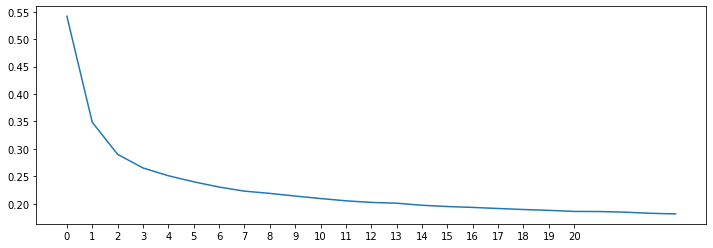

In [ ]:
losses_lstm = lstm_model.history.history['loss']

plt.figure(figsize=(12,4))
plt.xticks(np.arange(0,21,1))
plt.plot(range(len(losses_lstm)),losses_lstm);

In [ ]:
lstm_predictions_scaled = list()

batch = train[-n_input:]
current_batch = batch.values.reshape((1, n_input, n_features))

for i in range(len(valid)):   
    lstm_pred = lstm_model.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred)
    current_batch = np.append(current_batch[:,1:,:],[[lstm_pred]], axis=1)



predictions = lstm_model.predict_generator(valid_generator)
predictions.shape, valid.shape


from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
lstm_pred = pd.DataFrame(predictions, columns=df.columns)

#check rmse
for i in df.columns:
    try:
        print('RMSE value for', i, 'is : ', np.sqrt(mean_squared_error(lstm_pred[i], valid[i])))
        print('MSE value for', i, 'is : ', (mean_squared_error(lstm_pred[i], valid[i])))
        print('MAE value for', i, 'is : ', (mean_absolute_error(lstm_pred[i], valid[i])))
        print('R2 value for', i, 'is : ', (r2_score(lstm_pred[i], valid[i],  multioutput='variance_weighted')))
    except Exception as err:
        print(i, err)
   

RMSE value for PM2.5 is :  0.3123990814806378
MSE value for PM2.5 is :  0.09759318610994616
MAE value for PM2.5 is :  0.17817069246610415
R2 value for PM2.5 is :  0.9257847728159083
RMSE value for PM10 is :  0.35738665350636817
MSE value for PM10 is :  0.12772522010448084
MAE value for PM10 is :  0.2051339253058579
R2 value for PM10 is :  0.8776883762628271
RMSE value for SO2 is :  0.26982207741135805
MSE value for SO2 is :  0.07280395345858089
MAE value for SO2 is :  0.1548531049492497
R2 value for SO2 is :  0.8430137178937265
RMSE value for NO2 is :  0.35637391017033526
MSE value for NO2 is :  0.1270023638500942
MAE value for NO2 is :  0.2330386598399498
R2 value for NO2 is :  0.8770922086798041
RMSE value for CO is :  0.3999519796664846
MSE value for CO is :  0.15996158603914012
MAE value for CO is :  0.2143085527059307
R2 value for CO is :  0.9022414093282707
RMSE value for O3 is :  0.2908070699307168
MSE value for O3 is :  0.08456875192168882
MAE value for O3 is :  0.2031226600522

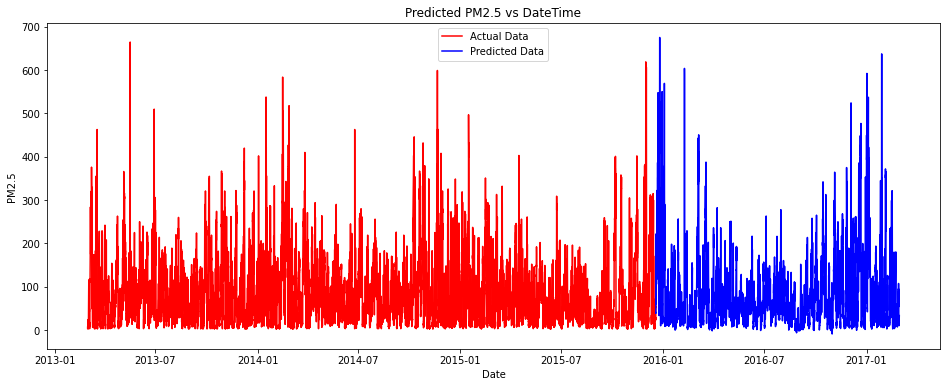

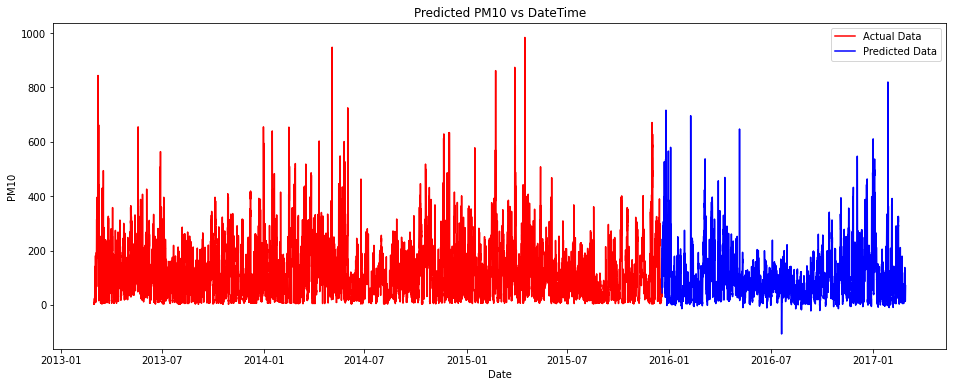

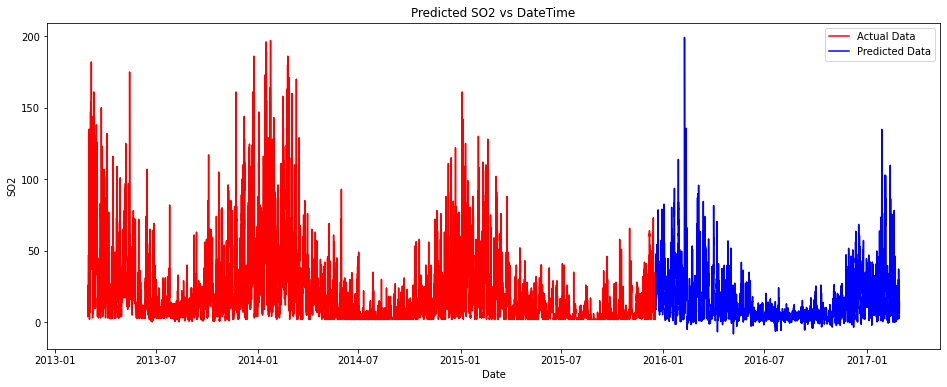

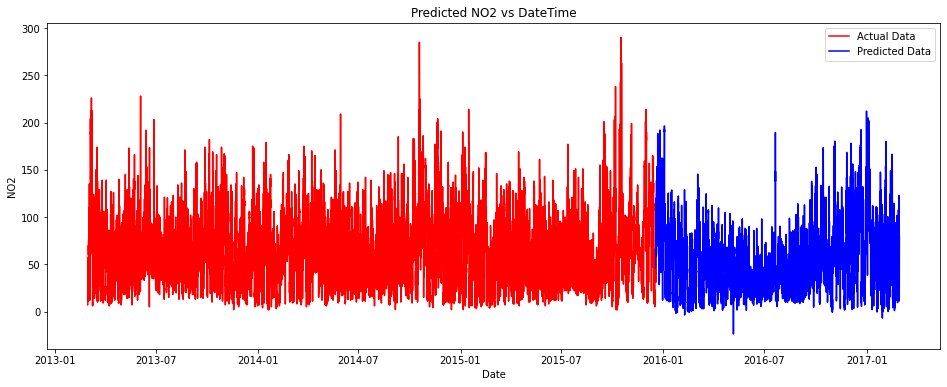

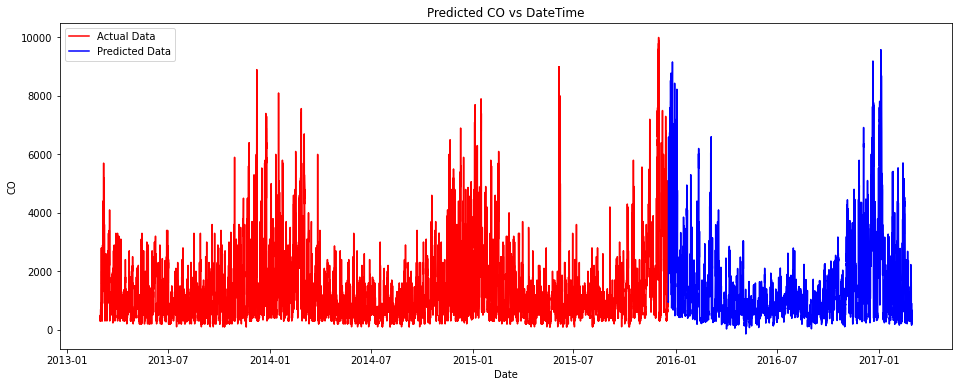

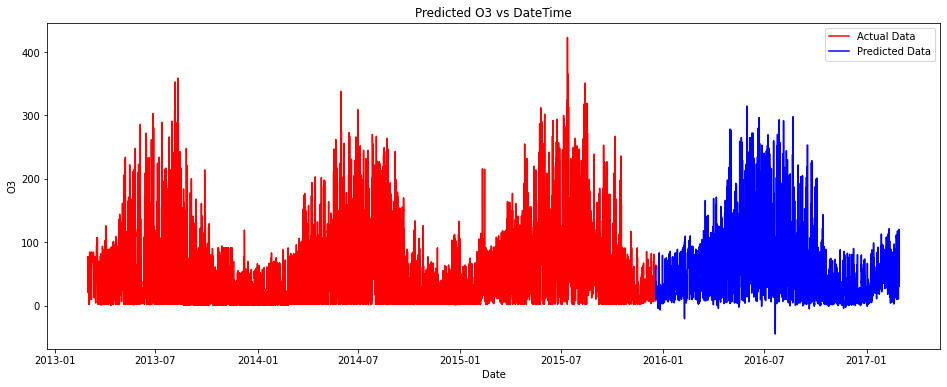

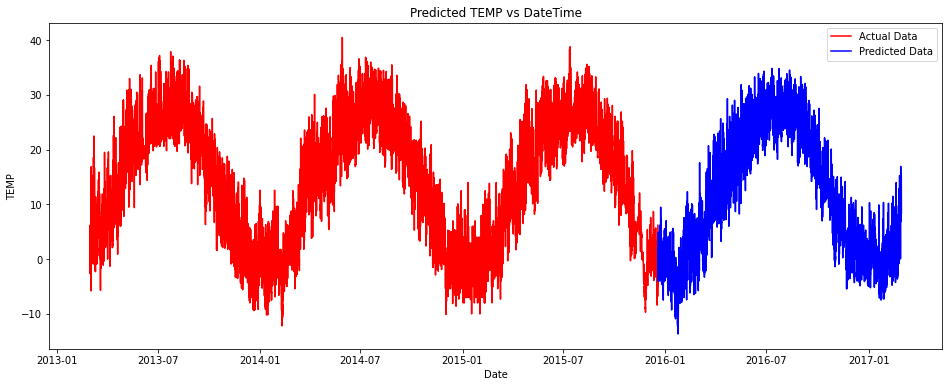

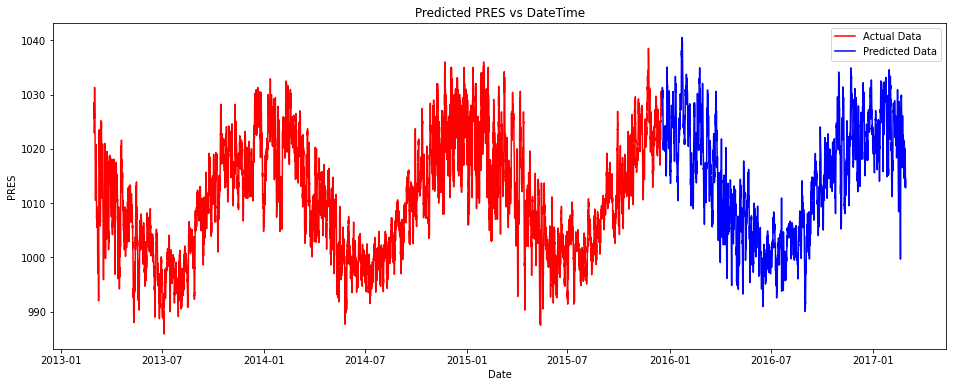

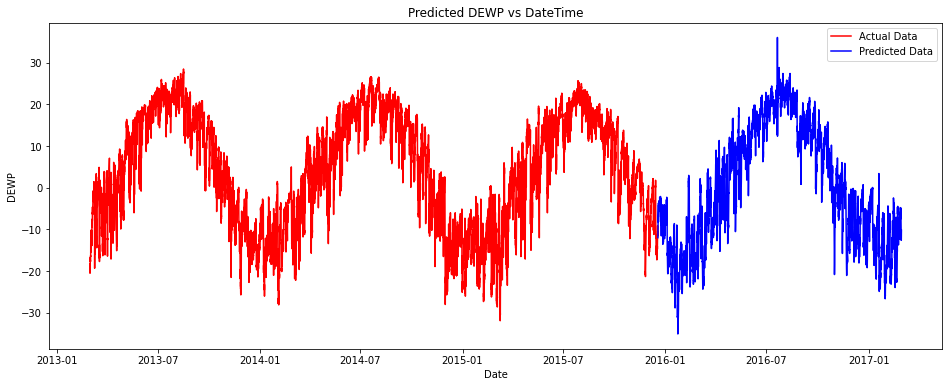

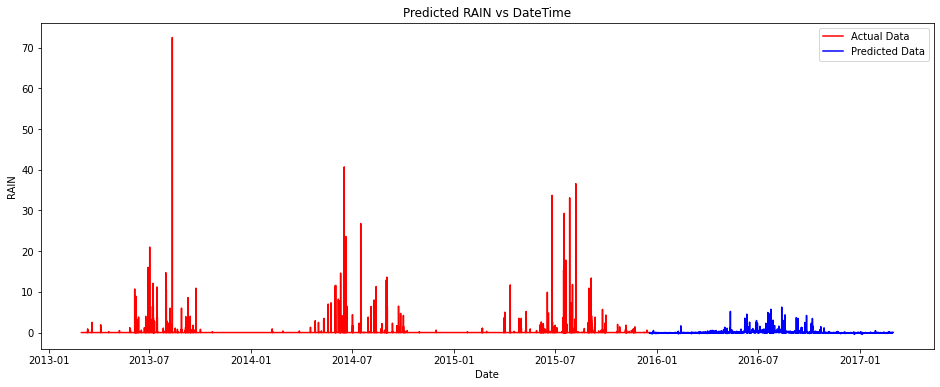

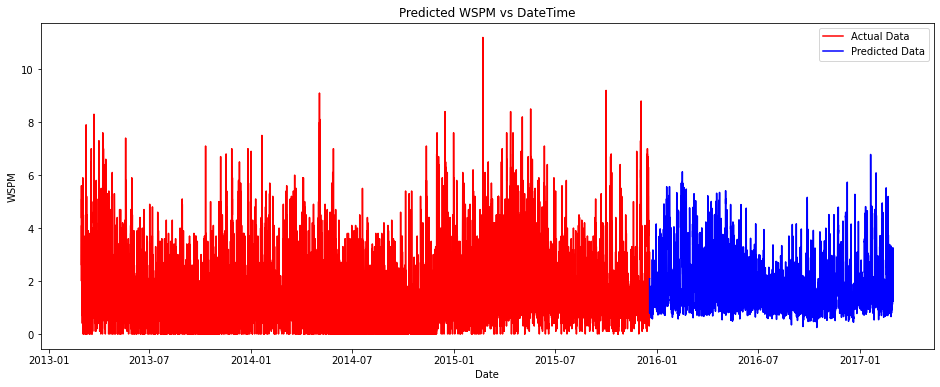

In [ ]:
plot_pred_date(lstm_pred)

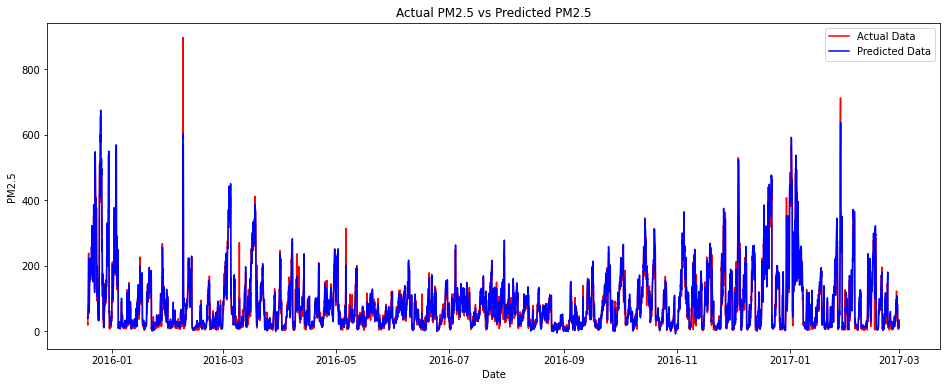

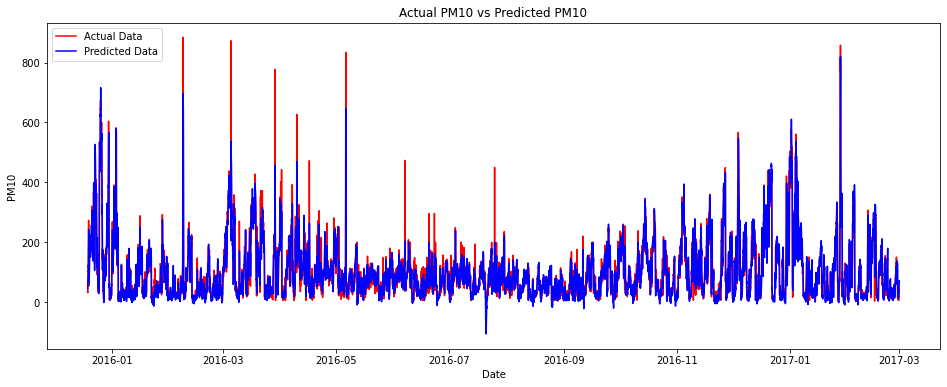

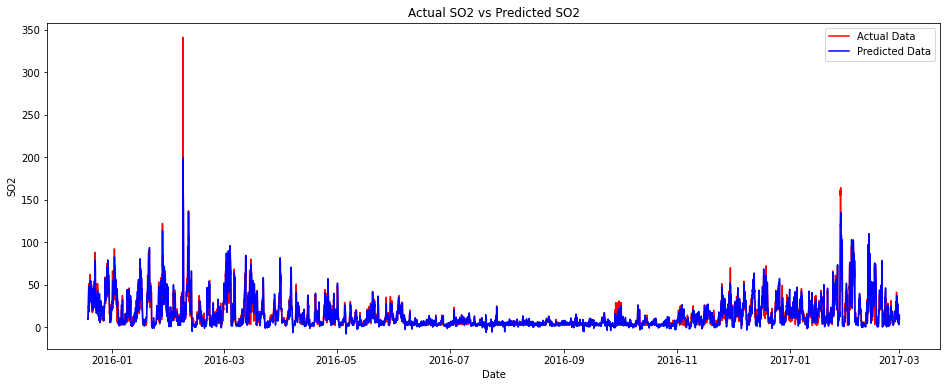

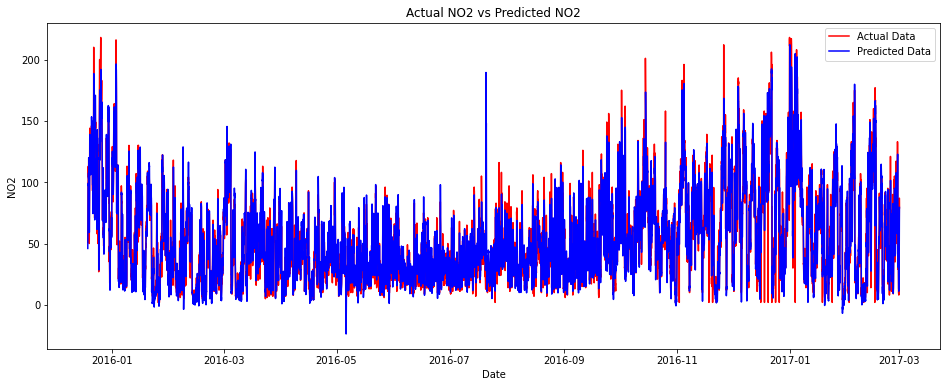

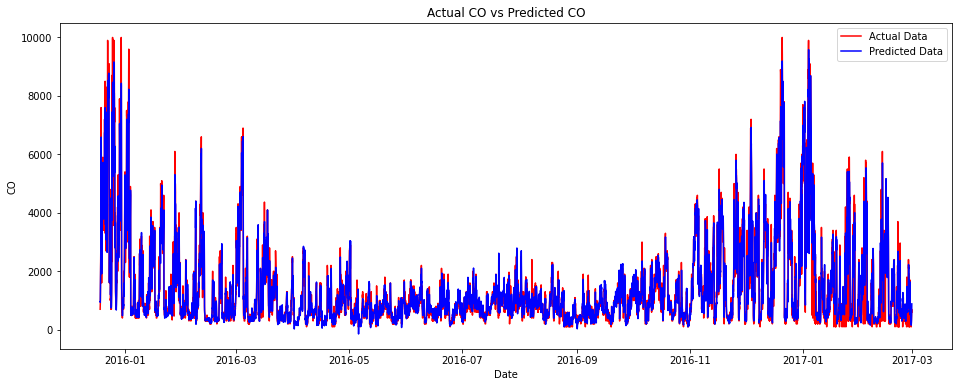

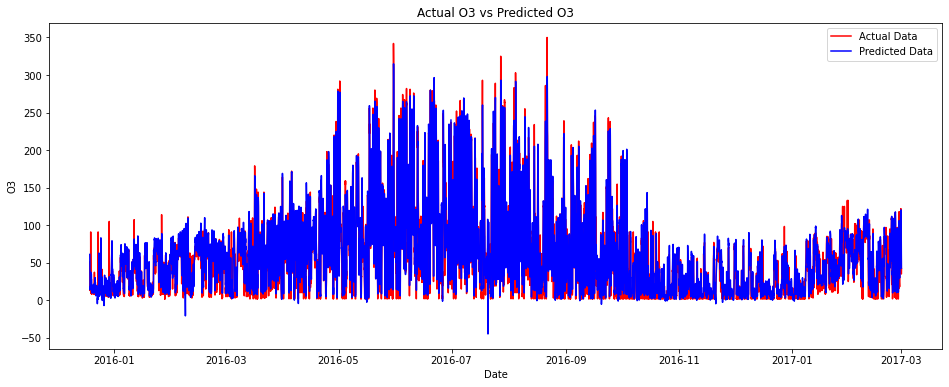

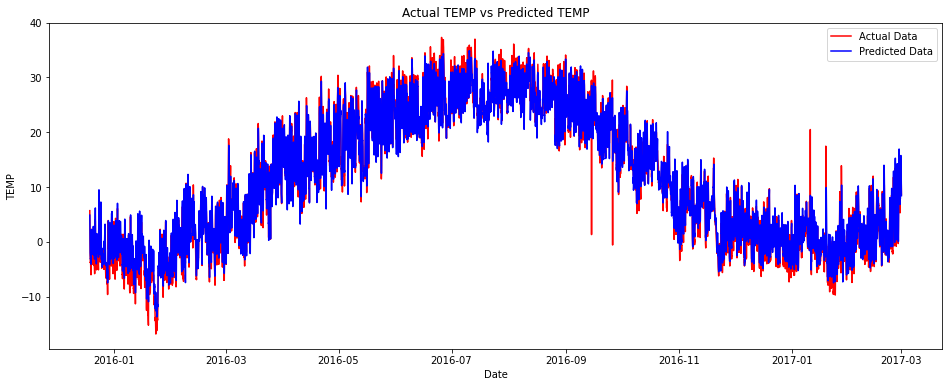

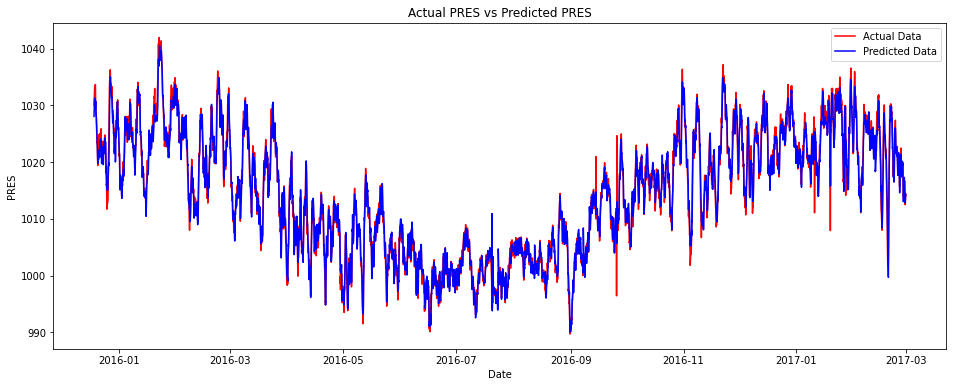

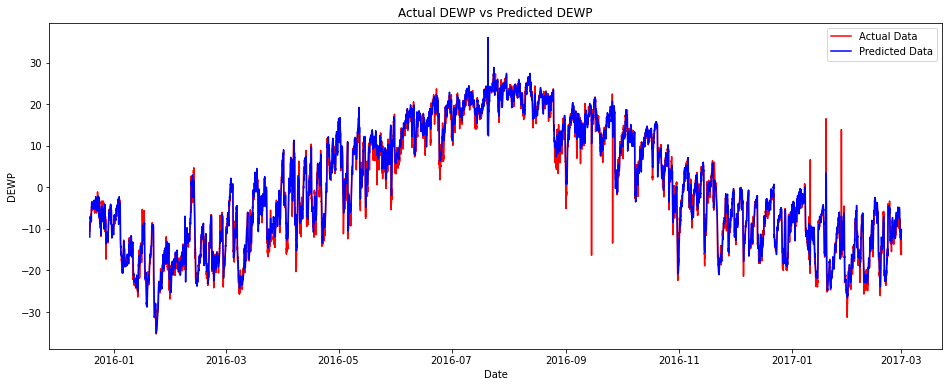

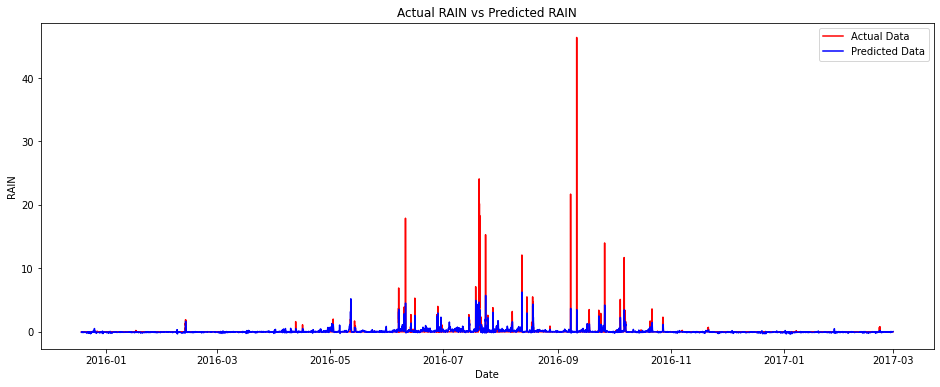

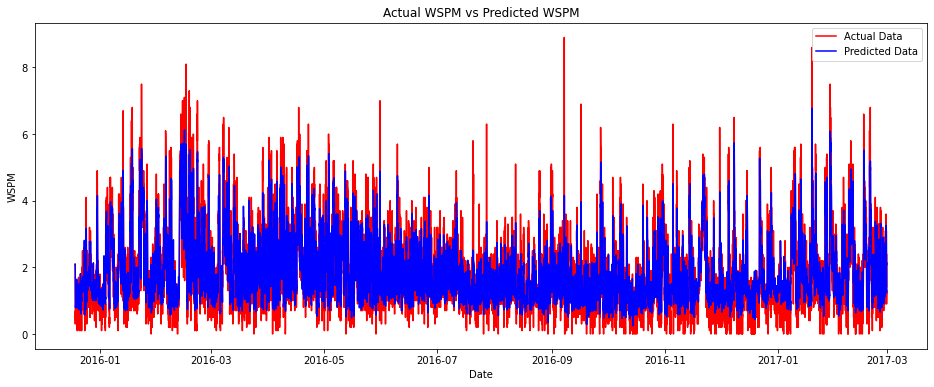

In [ ]:
plot_actual_pred(lstm_pred)